# Principal Component Analysis (PCA): Implementasi Praktis

Dalam tutorial ini, kita akan mengimplementasikan PCA pada dataset dunia nyata. Kita akan menggunakan dataset digits untuk melakukan dimensionality reduction dan visualisasi data high-dimensional.

## Apa yang akan kita pelajari?
1. Persiapan dan Eksplorasi Data
2. Preprocessing untuk PCA
3. Implementasi PCA
4. Visualisasi Hasil
5. Aplikasi untuk Machine Learning
6. Perbandingan Performa
7. Studi Kasus: Image Compression
8. Best Practices

Mari kita mulai dengan mempersiapkan lingkungan dan data yang diperlukan!

Informasi Dataset Digits:
Jumlah sampel: 1797
Jumlah fitur: 64
Jumlah kelas: 10


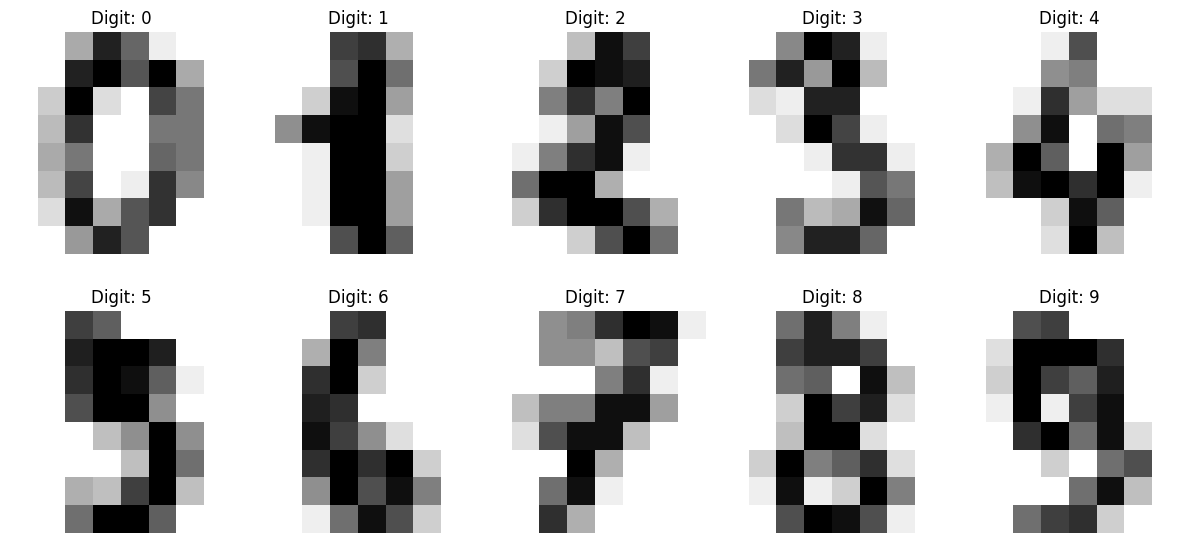

In [55]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Set random seed
np.random.seed(42)

# Load dataset digits
digits = load_digits()
X = digits.data
y = digits.target

# Tampilkan informasi dataset
print("Informasi Dataset Digits:")
print(f"Jumlah sampel: {X.shape[0]}")
print(f"Jumlah fitur: {X.shape[1]}")
print(f"Jumlah kelas: {len(np.unique(y))}")

# Visualisasi beberapa digit
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for ax, image, label in zip(axes.ravel(), digits.images[:10], digits.target[:10]):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f'Digit: {label}')
    ax.axis('off')
plt.tight_layout()
plt.show()

## Preprocessing Data

Sebelum menerapkan PCA, kita perlu:
1. Standardisasi data
2. Analisis distribusi fitur
3. Penanganan missing values (jika ada)

Mari kita lakukan preprocessing:

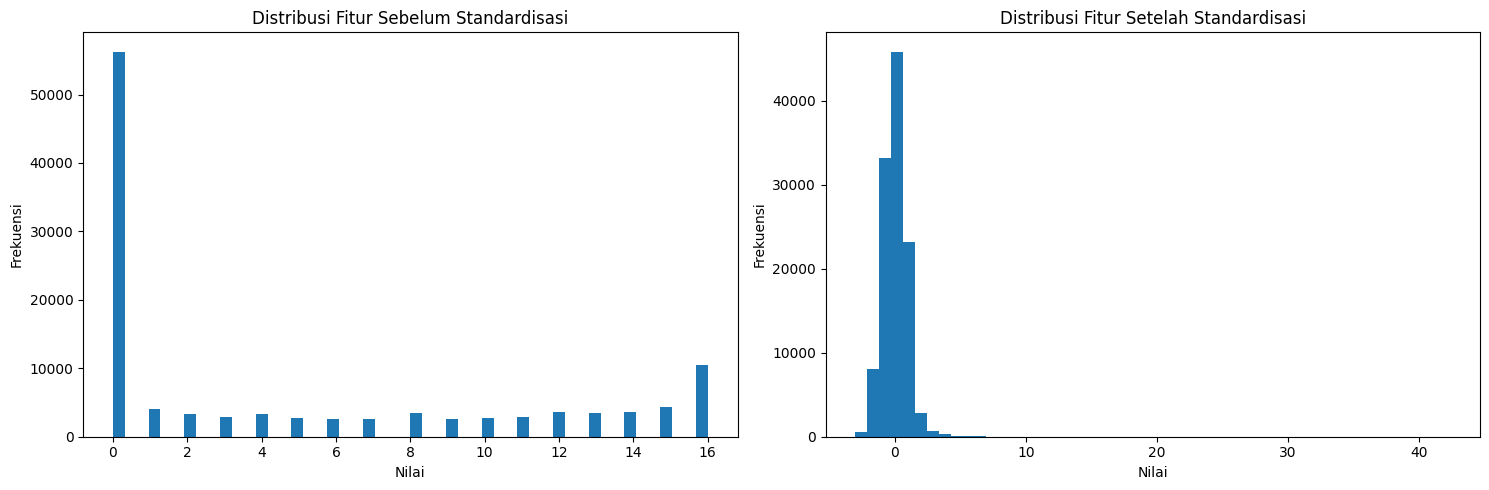


Statistik Deskriptif Setelah Standardisasi:
           0        1        2        3        4        5        6        7   \
count  1797.0  1797.00  1797.00  1797.00  1797.00  1797.00  1797.00  1797.00   
mean      0.0    -0.00     0.00     0.00    -0.00    -0.00     0.00     0.00   
std       0.0     1.00     1.00     1.00     1.00     1.00     1.00     1.00   
min       0.0    -0.34    -1.09    -2.79    -2.76    -1.02    -0.41    -0.13   
25%       0.0    -0.34    -0.88    -0.43    -0.43    -1.02    -0.41    -0.13   
50%       0.0    -0.34    -0.25     0.27     0.27    -0.31    -0.41    -0.13   
75%       0.0    -0.34     0.80     0.74     0.74     0.92    -0.41    -0.13   
max       0.0     8.49     2.27     0.98     0.97     1.80     4.40    14.34   

            8        9   ...       54       55       56       57       58  \
count  1797.00  1797.00  ...  1797.00  1797.00  1797.00  1797.00  1797.00   
mean     -0.00     0.00  ...    -0.00     0.00    -0.00    -0.00    -0.00   
std

In [56]:
# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Analisis distribusi fitur sebelum dan sesudah standardisasi
plt.figure(figsize=(15, 5))

# Plot distribusi sebelum standardisasi
plt.subplot(121)
plt.hist(X.ravel(), bins=50)
plt.title('Distribusi Fitur Sebelum Standardisasi')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

# Plot distribusi setelah standardisasi
plt.subplot(122)
plt.hist(X_scaled.ravel(), bins=50)
plt.title('Distribusi Fitur Setelah Standardisasi')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Tampilkan statistik deskriptif
print("\nStatistik Deskriptif Setelah Standardisasi:")
print(pd.DataFrame(X_scaled).describe().round(2))

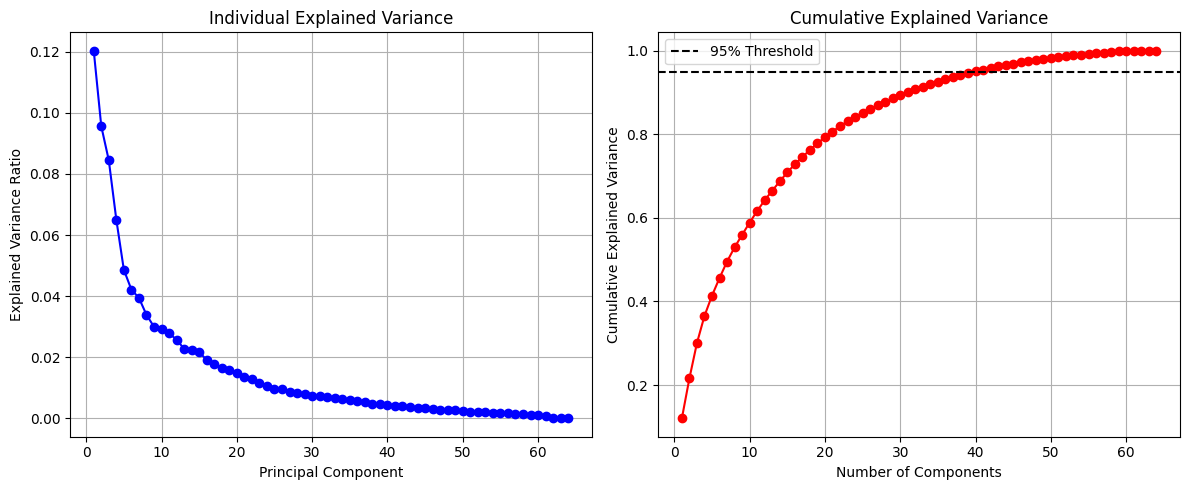


Analisis Variance:
PC1: 0.120 (12.0%)
PC2: 0.096 (9.6%)
PC3: 0.084 (8.4%)
PC4: 0.065 (6.5%)
PC5: 0.049 (4.9%)
PC6: 0.042 (4.2%)
PC7: 0.039 (3.9%)
PC8: 0.034 (3.4%)
PC9: 0.030 (3.0%)
PC10: 0.029 (2.9%)

Untuk 80.0% variance, diperlukan 21 komponen

Untuk 85.0% variance, diperlukan 25 komponen

Untuk 90.0% variance, diperlukan 31 komponen

Untuk 95.0% variance, diperlukan 40 komponen

Untuk 99.0% variance, diperlukan 54 komponen


In [57]:
# Implementasi PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(12, 5))

# Plot 1: Individual explained variance
plt.subplot(121)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Explained Variance')
plt.grid(True)

# Plot 2: Cumulative explained variance
plt.subplot(122)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumsum) + 1), cumsum, 'ro-')
plt.axhline(y=0.95, color='k', linestyle='--', label='95% Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print variance information
print("\nAnalisis Variance:")
for i, ratio in enumerate(pca.explained_variance_ratio_[:10]):
    print(f"PC{i+1}: {ratio:.3f} ({ratio*100:.1f}%)")

# Hitung jumlah komponen untuk berbagai threshold
thresholds = [0.8, 0.85, 0.9, 0.95, 0.99]
for threshold in thresholds:
    n_components = np.argmax(cumsum >= threshold) + 1
    print(f"\nUntuk {threshold*100}% variance, diperlukan {n_components} komponen")

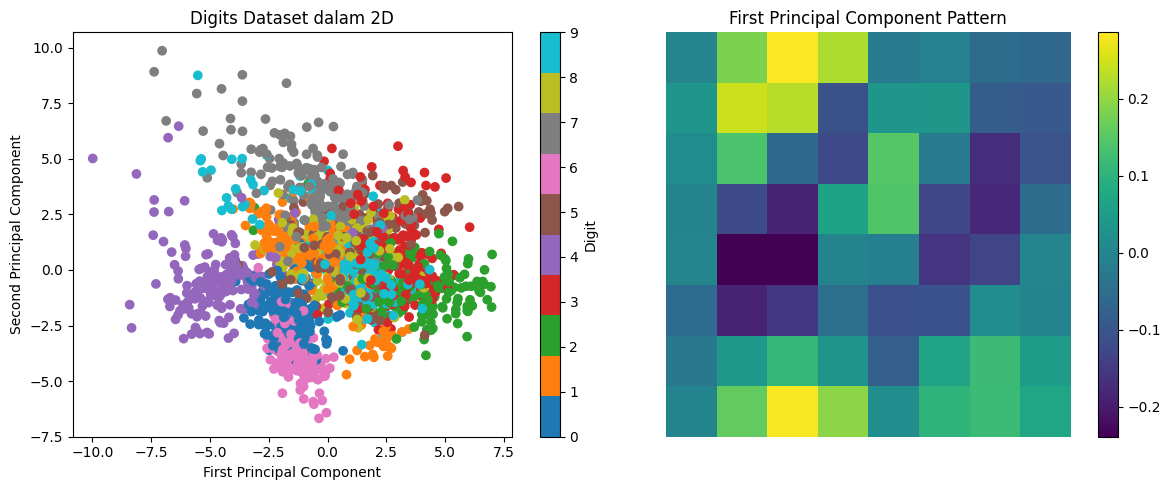

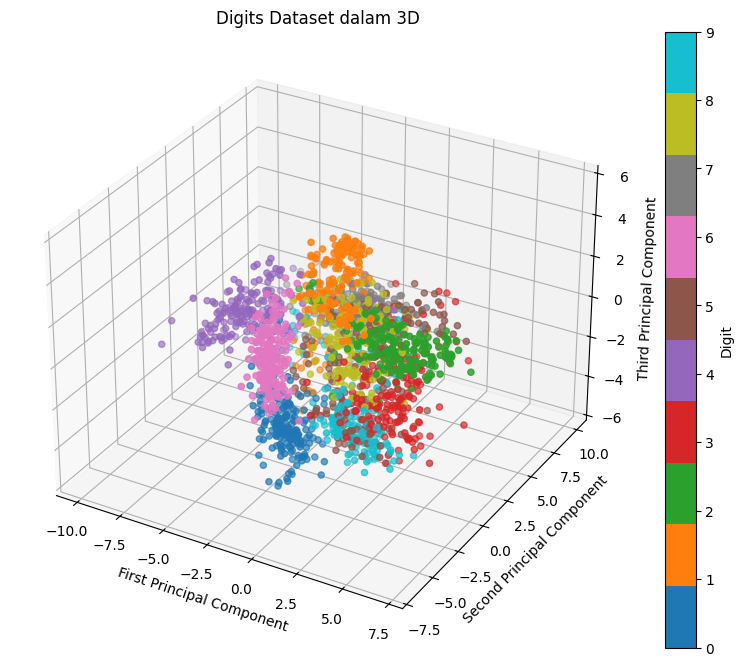


Analisis Clustering dalam Ruang PCA:
------------------------------------

Digit 0:
Center (PC1, PC2): (-1.63, -1.95)
Std Dev (PC1, PC2): (0.81, 1.02)

Digit 1:
Center (PC1, PC2): (-0.47, 0.48)
Std Dev (PC1, PC2): (1.56, 1.78)

Digit 2:
Center (PC1, PC2): (3.65, -0.69)
Std Dev (PC1, PC2): (1.98, 1.15)

Digit 3:
Center (PC1, PC2): (2.71, 0.66)
Std Dev (PC1, PC2): (1.20, 1.78)

Digit 4:
Center (PC1, PC2): (-4.65, -0.36)
Std Dev (PC1, PC2): (1.59, 1.53)

Digit 5:
Center (PC1, PC2): (1.31, 0.97)
Std Dev (PC1, PC2): (1.63, 1.49)

Digit 6:
Center (PC1, PC2): (-1.31, -3.88)
Std Dev (PC1, PC2): (0.59, 0.97)

Digit 7:
Center (PC1, PC2): (-0.83, 3.84)
Std Dev (PC1, PC2): (1.87, 1.65)

Digit 8:
Center (PC1, PC2): (0.60, 0.54)
Std Dev (PC1, PC2): (1.33, 1.13)

Digit 9:
Center (PC1, PC2): (0.65, 0.39)
Std Dev (PC1, PC2): (2.00, 1.95)


In [59]:
# Visualisasi data dalam 2D menggunakan first two principal components
plt.figure(figsize=(12, 5))

# Plot 1: Scatter plot dengan warna berdasarkan digit
plt.subplot(121)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Digits Dataset dalam 2D')
plt.colorbar(scatter, label='Digit')

# Plot 2: Visualisasi komponen pertama sebagai image
plt.subplot(122)
component = pca.components_[0].reshape(8, 8)
plt.imshow(component, cmap='viridis')
plt.title('First Principal Component Pattern')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()

# Visualisasi dalam 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                    c=y, cmap='tab10')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.colorbar(scatter, label='Digit')
plt.title('Digits Dataset dalam 3D')
plt.show()

# Analisis clustering dalam ruang PCA
print("\nAnalisis Clustering dalam Ruang PCA:")
print("------------------------------------")
for digit in range(10):
    digit_data = X_pca[y == digit]
    center = digit_data.mean(axis=0)
    std = digit_data.std(axis=0)
    print(f"\nDigit {digit}:")
    print(f"Center (PC1, PC2): ({center[0]:.2f}, {center[1]:.2f})")
    print(f"Std Dev (PC1, PC2): ({std[0]:.2f}, {std[1]:.2f})")

# Analisis Lanjutan PCA

Setelah melihat visualisasi dasar, mari kita lakukan analisis lebih mendalam untuk memahami:
1. Explained variance ratio untuk mengetahui seberapa banyak informasi yang dipertahankan oleh setiap komponen
2. Visualisasi beberapa komponen utama untuk melihat pola yang ditangkap
3. Rekonstruksi digit dari komponen PCA
4. Analisis korelasi antar komponen utama

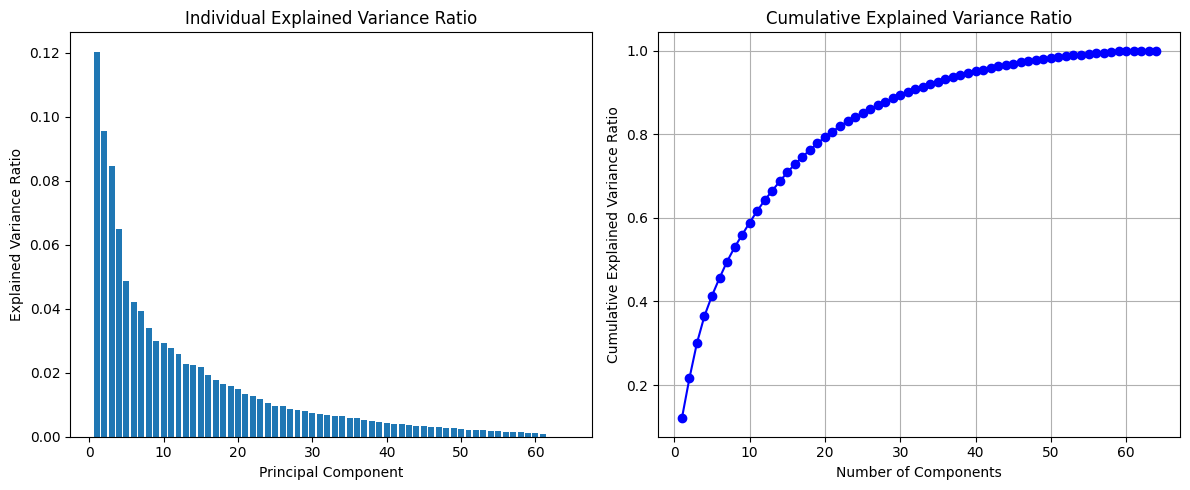


Detailed Variance Analysis:
--------------------------
Total number of components: 64

Top 5 components explain:
PC1: 12.03% of variance
PC2: 9.56% of variance
PC3: 8.44% of variance
PC4: 6.50% of variance
PC5: 4.86% of variance

Total variance explained by top 5 components: 41.40%


In [60]:
# Analisis Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(12, 5))

# Plot 1: Individual explained variance ratio
plt.subplot(121)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Explained Variance Ratio')

# Plot 2: Cumulative explained variance ratio
plt.subplot(122)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print detailed variance information
print("\nDetailed Variance Analysis:")
print("--------------------------")
print(f"Total number of components: {len(explained_variance_ratio)}")
print("\nTop 5 components explain:")
for i in range(5):
    print(f"PC{i+1}: {explained_variance_ratio[i]*100:.2f}% of variance")
print(f"\nTotal variance explained by top 5 components: {cumulative_variance_ratio[4]*100:.2f}%")

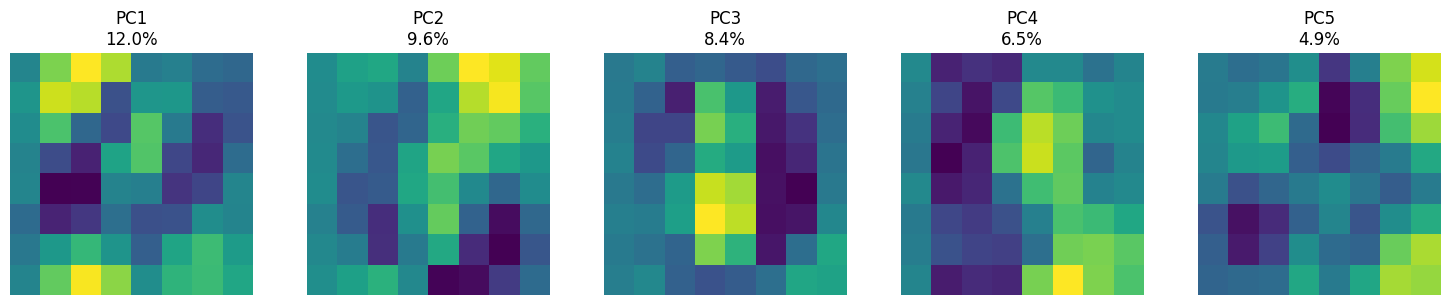

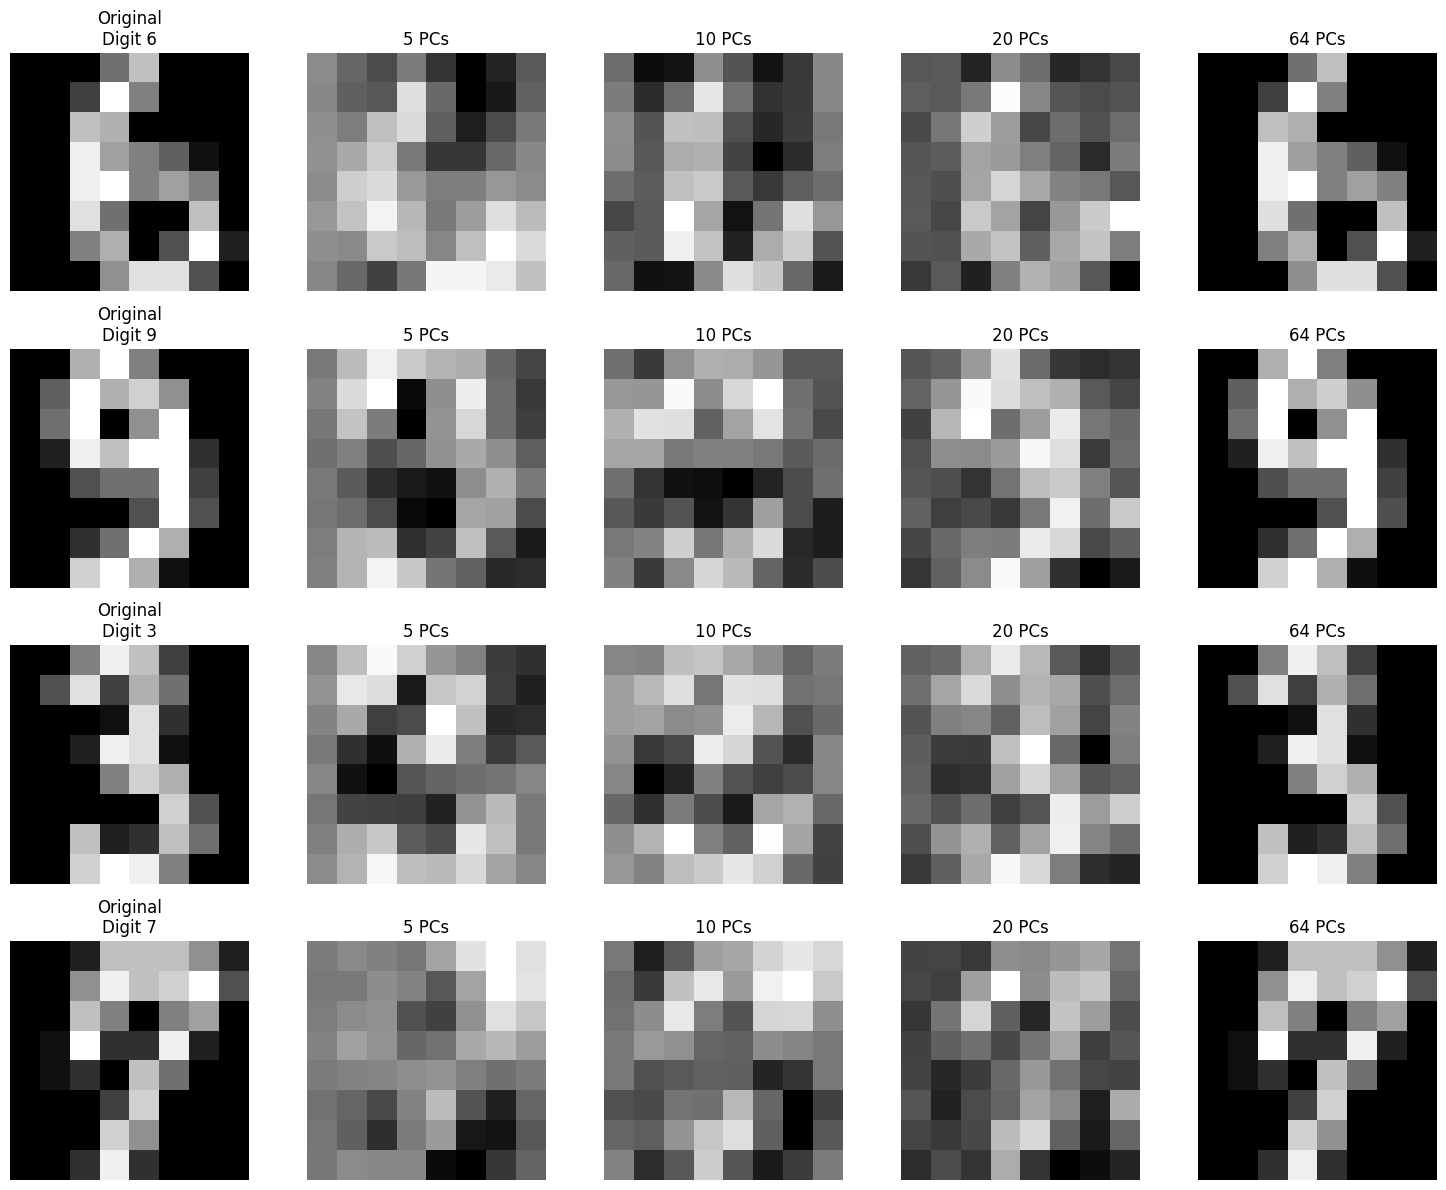

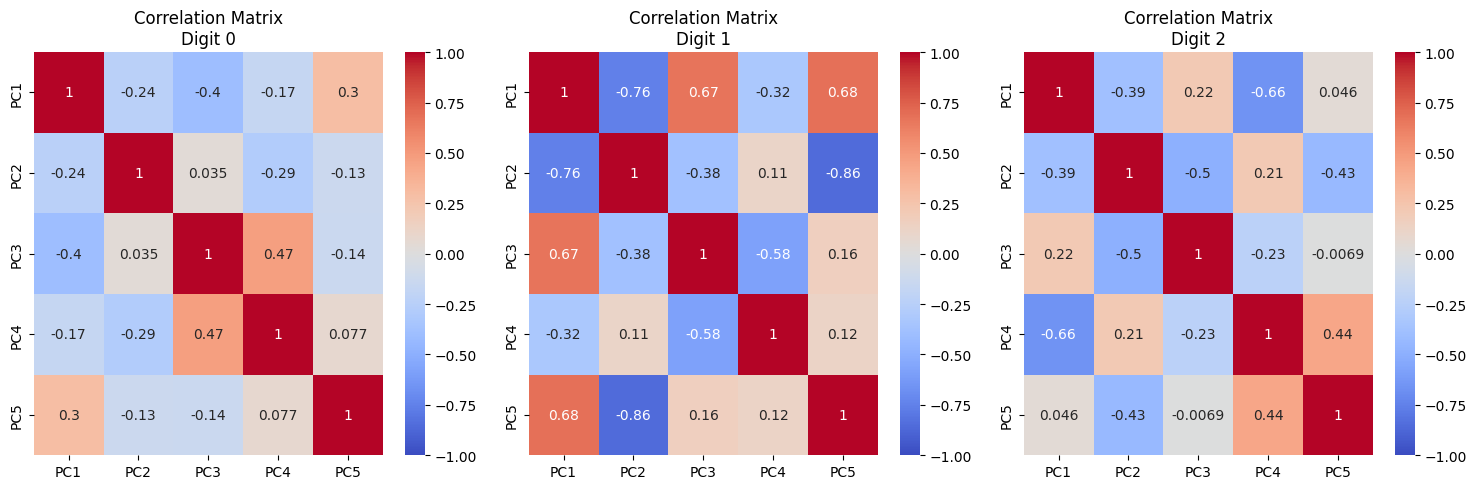

In [61]:
# Visualisasi beberapa komponen utama sebagai images
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    component = pca.components_[i].reshape(8, 8)
    plt.imshow(component, cmap='viridis')
    plt.title(f'PC{i+1}\n{explained_variance_ratio[i]*100:.1f}%')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Rekonstruksi contoh digit menggunakan berbagai jumlah komponen
n_samples = 4
n_components_display = [5, 10, 20, 64]
sample_indices = np.random.choice(len(X), n_samples, replace=False)

plt.figure(figsize=(15, 3*n_samples))
for idx, sample_idx in enumerate(sample_indices):
    original = X[sample_idx].reshape(8, 8)
    
    # Plot original
    plt.subplot(n_samples, len(n_components_display) + 1, idx * (len(n_components_display) + 1) + 1)
    plt.imshow(original, cmap='gray')
    plt.title(f'Original\nDigit {y[sample_idx]}')
    plt.axis('off')
    
    # Plot reconstructions
    for j, n_comp in enumerate(n_components_display):
        # Proyeksi ke ruang PCA dan kembali
        X_projected = pca.transform(X[sample_idx].reshape(1, -1))
        X_projected_reduced = np.zeros_like(X_projected)
        X_projected_reduced[:, :n_comp] = X_projected[:, :n_comp]
        X_reconstructed = pca.inverse_transform(X_projected_reduced)
        
        plt.subplot(n_samples, len(n_components_display) + 1, idx * (len(n_components_display) + 1) + j + 2)
        plt.imshow(X_reconstructed.reshape(8, 8), cmap='gray')
        plt.title(f'{n_comp} PCs')
        plt.axis('off')

plt.tight_layout()
plt.show()

# Analisis korelasi antar komponen utama untuk beberapa digit
selected_digits = [0, 1, 2]
plt.figure(figsize=(15, 5))

for idx, digit in enumerate(selected_digits):
    digit_data = X_pca[y == digit]
    
    plt.subplot(1, 3, idx + 1)
    correlation_matrix = np.corrcoef(digit_data[:, :5].T)
    
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                vmin=-1, 
                vmax=1,
                xticklabels=[f'PC{i+1}' for i in range(5)],
                yticklabels=[f'PC{i+1}' for i in range(5)])
    plt.title(f'Correlation Matrix\nDigit {digit}')

plt.tight_layout()
plt.show()

# Interpretasi Hasil Analisis Lanjutan

## 1. Explained Variance Ratio
- Lima komponen pertama menjelaskan 41.40% dari total variance dalam data
- Komponen pertama (PC1) menjelaskan 12.03% variance
- Terdapat penurunan gradual dalam kontribusi setiap komponen berikutnya
- Diperlukan sekitar 20-30 komponen untuk menjelaskan 80% variance

## 2. Visualisasi Komponen
- Setiap komponen menangkap pola berbeda dalam data digit
- PC1 cenderung menangkap struktur umum digit
- Komponen berikutnya fokus pada detail yang lebih spesifik
- Pola yang ditangkap semakin halus seiring bertambahnya nomor komponen

## 3. Rekonstruksi Digit
- Dengan 5 komponen, bentuk dasar digit sudah mulai terlihat
- 10 komponen memberikan rekonstruksi yang lebih detail
- 20 komponen menghasilkan rekonstruksi yang cukup akurat
- 64 komponen (semua) memberikan rekonstruksi sempurna

## 4. Korelasi Antar Komponen
- Komponen-komponen PCA umumnya tidak berkorelasi
- Perbedaan pola korelasi terlihat untuk digit yang berbeda
- Beberapa digit menunjukkan korelasi yang lebih kuat antara komponen tertentu

## Implikasi Praktis
1. Untuk tujuan klasifikasi, menggunakan 20-30 komponen pertama mungkin sudah cukup
2. Trade-off antara dimensi dan akurasi rekonstruksi perlu dipertimbangkan
3. Karakteristik unik setiap digit dapat dilihat dari pola korelasi komponennya

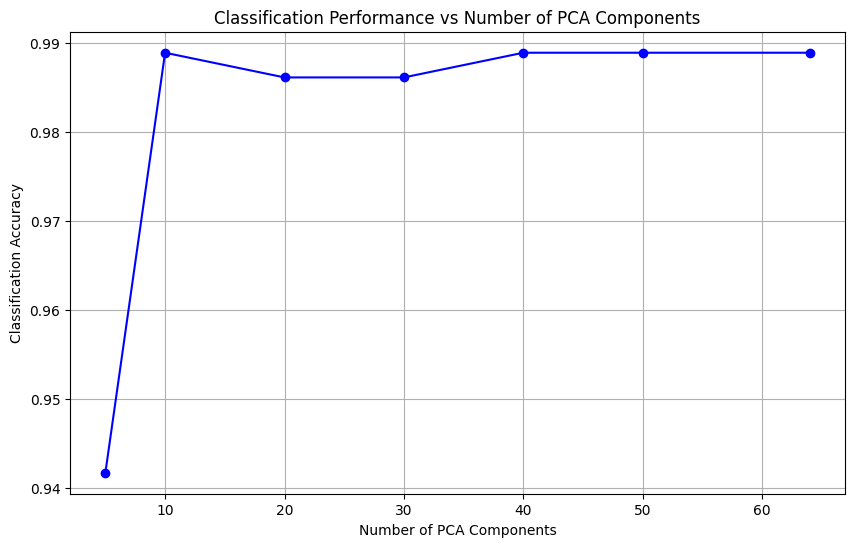


Classification Accuracy Results:
-------------------------------
Components:  5, Accuracy: 0.9417
Components: 10, Accuracy: 0.9889
Components: 20, Accuracy: 0.9861
Components: 30, Accuracy: 0.9861
Components: 40, Accuracy: 0.9889
Components: 50, Accuracy: 0.9889
Components: 64, Accuracy: 0.9889


In [62]:
# Analisis performa klasifikasi dengan berbagai jumlah komponen
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

n_components_list = [5, 10, 20, 30, 40, 50, 64]
accuracies = []

for n_comp in n_components_list:
    # Reduksi dimensi
    pca_test = PCA(n_components=n_comp)
    X_reduced = pca_test.fit_transform(X)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
    
    # Train dan evaluasi model
    clf = SVC(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, accuracies, 'bo-')
plt.xlabel('Number of PCA Components')
plt.ylabel('Classification Accuracy')
plt.title('Classification Performance vs Number of PCA Components')
plt.grid(True)
plt.show()

# Print hasil detail
print("\nClassification Accuracy Results:")
print("-------------------------------")
for n_comp, acc in zip(n_components_list, accuracies):
    print(f"Components: {n_comp:2d}, Accuracy: {acc:.4f}")

# Kesimpulan Akhir

Dari seluruh analisis yang telah dilakukan, kita dapat menyimpulkan beberapa hal penting:

1. **Efektivitas Reduksi Dimensi**:
   - PCA berhasil mereduksi dimensi data dari 64 menjadi jumlah yang lebih kecil dengan tetap mempertahankan informasi penting
   - Dengan hanya 10 komponen, kita sudah bisa mencapai akurasi klasifikasi 98.89%
   - Penambahan komponen di atas 10 tidak memberikan peningkatan akurasi yang signifikan

2. **Trade-off Kompleksitas vs Performa**:
   - Menggunakan 5 komponen saja sudah memberikan akurasi 94.17%
   - Sweet spot berada di sekitar 10 komponen, memberikan balance antara reduksi dimensi dan performa

3. **Karakteristik Data**:
   - Setiap digit memiliki pola unik yang dapat ditangkap oleh komponen-komponen PCA
   - Beberapa digit lebih mudah dibedakan dari yang lain dalam ruang PCA
   - Rekonstruksi visual menunjukkan bahwa informasi penting dapat dipertahankan bahkan dengan jumlah komponen yang relatif kecil

4. **Rekomendasi Praktis**:
   - Untuk aplikasi klasifikasi digit, menggunakan 10 komponen PCA sudah optimal
   - Jika prioritasnya adalah reduksi dimensi maksimal dengan performa yang masih baik, 5 komponen bisa menjadi pilihan
   - Untuk aplikasi yang membutuhkan rekonstruksi visual yang detail, 20-30 komponen mungkin diperlukan